# Project: Good and Bad Customers for Granting Credit

# Problem Statement

The banks with the intent of credit card were more focused on the number of customers using their credit service but the drawback of them not being able to pay back the credit in time was an issue that soon followed, a system was in need to effectively decide the credit limit to be allowed to a person based on his previous credit history. We will see how to apply Logistic Regression to credibility of the customer.

We are going to build a classification model using logistic regression to predict the credibility of the customer, in order to minimize the risk and maximize the profit of a bank. Also evaluate our Logistic Regression model using various parameter like on Accuracy, Sensitivity, Specificity and area under the ROC curve.

# Data Description

##### Our Data set is going to have these input variabels:  

- Loan_ID - Unique Loan ID

- Gender - Male/ Female

- Married - Applicant married (Y/N)

- Dependents - Number of dependents

- Education -	Applicant Education (Graduate/ Under Graduate)

- Self_Employed - Self employed (Y/N)

- ApplicantIncome - Applicant income

- CoapplicantIncome - Coapplicant income

- LoanAmount - Loan amount in thousands

- Loan_Amount_Term - Term of loan in months

- Credit_History - credit history meets guidelines

- Property_Area -	Urban/ Semi Urban/ Rural

##### Dependent Variable which is Loan_Status - Loan approved (Y/N)
 
  

# Model Selection

We will Select the best model. Our Model selection will be based on Accuracy, Sensitivity & Specificity and area under the ROC curve. 

# Expected Outcome

Higher accuracy in predicting the outcome using test data

# Loading Important Library

In [1]:
#Import the relevant packages

import os as os
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read the data set

cr_train = pd.read_csv("Credit_Risk_Train_data.csv")

cr_test = pd.read_csv("Credit_Risk_Test_data.csv")

cr_valid = pd.read_csv("Credit_Risk_Validate_data.csv")

In [4]:
#check the dimension of the dataset

print("Dimension of the training data",cr_train.shape)

print("Dimension of the training data",cr_test.shape)

print("Dimension of the training data",cr_valid.shape)

Dimension of the training data (614, 13)
Dimension of the training data (367, 12)
Dimension of the training data (367, 13)


In [5]:
#To see first 5 rows of data

cr_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
cr_train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
cr_valid.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'outcome'],
      dtype='object')

In [8]:
cr_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 43.2+ KB


In [9]:
cr_valid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
 12  outcome            367 non-null    object 
dtypes: float64(3), int64(2), object(8)
memory usage: 25.9+ KB


In [10]:
#Rename the column outcome to Loan status in valid data set

cr_valid.rename(columns={"outcome":"Loan_Status"}, inplace = True)

<AxesSubplot:>

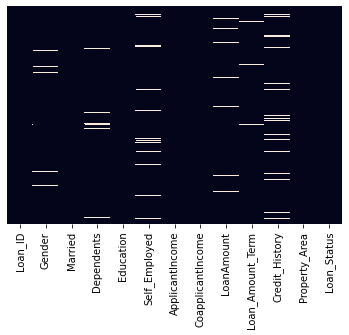

In [11]:
#Using heatmap to figure out missing data if any

sns.heatmap(cr_train.isnull(), yticklabels= False, cbar=False) #Cbar means colour bar which is useful for categorical variable

In [12]:
#To see total null values in each column

cr_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### Checking Category of Categorical Variables

In [13]:
cr_train["Gender"].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [14]:
cr_train["Married"].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [15]:
cr_train["Dependents"].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [16]:
cr_train["Education"].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [17]:
cr_train["Self_Employed"].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [18]:
cr_train["Credit_History"].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

# Imputation


### Training Data

In [19]:
#Imputation of categorical variables for training data

cr_train["Gender"].fillna("Male", inplace = True)

cr_train["Married"].fillna("Yes", inplace = True)

cr_train["Dependents"].fillna("0", inplace = True)

cr_train["Education"].fillna("Graduate", inplace = True)

cr_train["Self_Employed"].fillna("No", inplace = True)

cr_train["Credit_History"].fillna(1, inplace = True)

In [20]:
#Summing up all the null values in each column/variable
cr_train.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [21]:
#Compute the median value for loan amount

np.nanmedian(cr_train['LoanAmount'])

128.0

In [22]:
#Compute themedian value for Loan Amount Term

np.nanmedian(cr_train['Loan_Amount_Term'])

360.0

In [23]:
#Imputation for loan amount and loan amount term

cr_train["LoanAmount"].fillna(128.0, inplace = True)

cr_train["Loan_Amount_Term"].fillna(360.0, inplace = True)

In [24]:
#Creating the dummy variables and dropping the old column

cr_train_dummy = pd.get_dummies(cr_train.drop(["Loan_ID"], axis =1),drop_first=True)

In [25]:
cr_train_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ApplicantIncome          614 non-null    int64  
 1   CoapplicantIncome        614 non-null    float64
 2   LoanAmount               614 non-null    float64
 3   Loan_Amount_Term         614 non-null    float64
 4   Credit_History           614 non-null    float64
 5   Gender_Male              614 non-null    uint8  
 6   Married_Yes              614 non-null    uint8  
 7   Dependents_1             614 non-null    uint8  
 8   Dependents_2             614 non-null    uint8  
 9   Dependents_3+            614 non-null    uint8  
 10  Education_Not Graduate   614 non-null    uint8  
 11  Self_Employed_Yes        614 non-null    uint8  
 12  Property_Area_Semiurban  614 non-null    uint8  
 13  Property_Area_Urban      614 non-null    uint8  
 14  Loan_Status_Y            6

In [26]:
cr_train_dummy.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,128.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1
1,4583,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,0,0,0,0,1,0,1,1
3,2583,2358.0,120.0,360.0,1.0,1,1,0,0,0,1,0,0,1,1
4,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1


<AxesSubplot:>

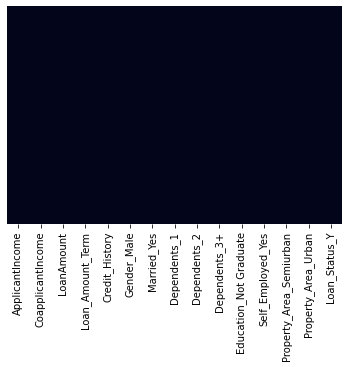

In [27]:
#using heatmap to figure out missing data if any

sns.heatmap(cr_train_dummy.isnull(),cbar=False, yticklabels=False)

### Validation Data

<AxesSubplot:>

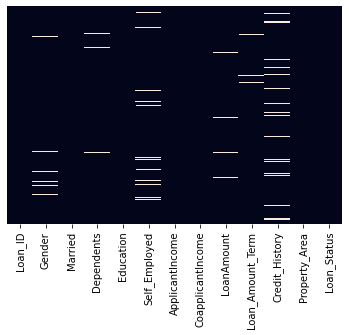

In [28]:
#using heatmap to figure out missing data if any

sns.heatmap(cr_valid.isnull(), cbar= False,yticklabels=False)

In [29]:
#Imputation of categorical variable for test data

cr_valid["Gender"].fillna("Male", inplace = True)

cr_valid["Married"].fillna("Yes", inplace = True)

cr_valid["Dependents"].fillna("0", inplace = True)

cr_valid["Education"].fillna("Graduate", inplace = True)

cr_valid["Self_Employed"].fillna("No", inplace = True)

cr_valid["Credit_History"].fillna(1, inplace = True)

In [30]:
#Summing up of all the missing values in each column

cr_valid.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           5
Loan_Amount_Term     6
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [31]:
#Compute the median value for Loan Amount

np.nanmedian(cr_valid["LoanAmount"])

125.0

In [32]:
#Compute the median value for Loan Amount Term

np.nanmedian(cr_valid["Loan_Amount_Term"])

360.0

In [33]:
#imputation for Loan Amount and Loan Amount Term

cr_valid["LoanAmount"].fillna(125.0,inplace = True)

cr_valid["Loan_Amount_Term"].fillna(360.0,inplace=True)

<AxesSubplot:>

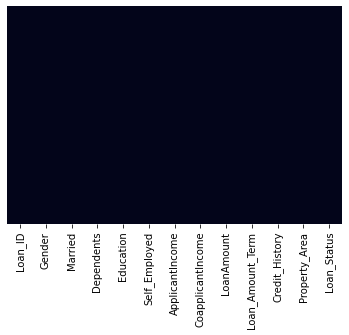

In [34]:
#Using heatmap to figure out missing data if any

sns.heatmap(cr_valid.isnull(),cbar=False,yticklabels=False)

In [35]:
#Dummy variables for validation dataset

cr_valid_dummy = pd.get_dummies(cr_valid.drop(["Loan_ID"], axis = 1),drop_first=True)

In [36]:
cr_valid_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ApplicantIncome          367 non-null    int64  
 1   CoapplicantIncome        367 non-null    int64  
 2   LoanAmount               367 non-null    float64
 3   Loan_Amount_Term         367 non-null    float64
 4   Credit_History           367 non-null    float64
 5   Gender_Male              367 non-null    uint8  
 6   Married_Yes              367 non-null    uint8  
 7   Dependents_1             367 non-null    uint8  
 8   Dependents_2             367 non-null    uint8  
 9   Dependents_3+            367 non-null    uint8  
 10  Education_Not Graduate   367 non-null    uint8  
 11  Self_Employed_Yes        367 non-null    uint8  
 12  Property_Area_Semiurban  367 non-null    uint8  
 13  Property_Area_Urban      367 non-null    uint8  
 14  Loan_Status_Y            3

In [37]:
cr_valid_dummy.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5720,0,110.0,360.0,1.0,1,1,0,0,0,0,0,0,1,1
1,3076,1500,126.0,360.0,1.0,1,1,1,0,0,0,0,0,1,1
2,5000,1800,208.0,360.0,1.0,1,1,0,1,0,0,0,0,1,1
3,2340,2546,100.0,360.0,1.0,1,1,0,1,0,0,0,0,1,1
4,3276,0,78.0,360.0,1.0,1,0,0,0,0,1,0,0,1,0


### Test Data

<AxesSubplot:>

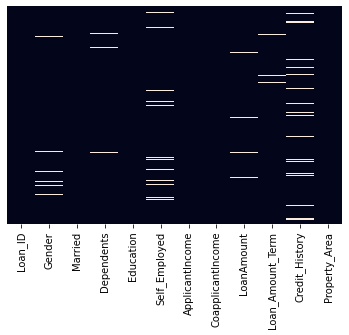

In [38]:
#using heatmap to figure out missing values if any

sns.heatmap(cr_test.isnull(), cbar=False,yticklabels=False)

In [39]:
#Imputation of categorical variables for test data

cr_test["Gender"].fillna("Male", inplace = True)

cr_test["Married"].fillna("Yes", inplace = True)

cr_test["Dependents"].fillna("0", inplace = True)

cr_test["Education"].fillna("Graduate", inplace = True)

cr_test["Self_Employed"].fillna("No", inplace = True)

cr_test["Credit_History"].fillna(1, inplace = True)

In [40]:
cr_test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           5
Loan_Amount_Term     6
Credit_History       0
Property_Area        0
dtype: int64

In [41]:
#compute median for Loan Amount

np.nanmedian(cr_test["LoanAmount"])

125.0

In [42]:
#compute the median for Loan Amount Term

np.nanmedian(cr_test["Loan_Amount_Term"])

360.0

In [43]:
#Imputation for Laon Amount and Laon Amount Term

cr_test["LoanAmount"].fillna(125.0,inplace=True)

cr_test["Loan_Amount_Term"].fillna(360.0,inplace=True)

<AxesSubplot:>

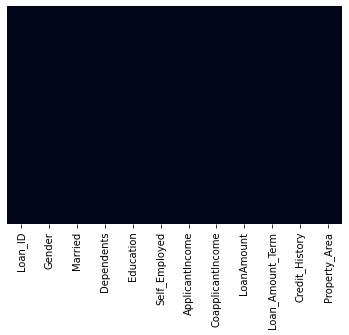

In [44]:
#using heatmap to figure out missing data if any

sns.heatmap(cr_test.isnull(),cbar=False, yticklabels=False)

In [45]:
#Dummy variables for test data

cr_test_dummy = pd.get_dummies(cr_test.drop(["Loan_ID"], axis = 1), drop_first=True)

In [46]:
cr_test_dummy.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,5720,0,110.0,360.0,1.0,1,1,0,0,0,0,0,0,1
1,3076,1500,126.0,360.0,1.0,1,1,1,0,0,0,0,0,1
2,5000,1800,208.0,360.0,1.0,1,1,0,1,0,0,0,0,1
3,2340,2546,100.0,360.0,1.0,1,1,0,1,0,0,0,0,1
4,3276,0,78.0,360.0,1.0,1,0,0,0,0,1,0,0,1


In [47]:
#Putting the validation data Target variable in a new object "Valid_Loan_Status"

Valid_Loan_Status = cr_valid_dummy["Loan_Status_Y"]

Valid_Loan_Status.value_counts()

1    290
0     77
Name: Loan_Status_Y, dtype: int64

In [48]:
#Dropping the column from the validation data set

del cr_valid_dummy["Loan_Status_Y"]

In [49]:
cr_valid_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ApplicantIncome          367 non-null    int64  
 1   CoapplicantIncome        367 non-null    int64  
 2   LoanAmount               367 non-null    float64
 3   Loan_Amount_Term         367 non-null    float64
 4   Credit_History           367 non-null    float64
 5   Gender_Male              367 non-null    uint8  
 6   Married_Yes              367 non-null    uint8  
 7   Dependents_1             367 non-null    uint8  
 8   Dependents_2             367 non-null    uint8  
 9   Dependents_3+            367 non-null    uint8  
 10  Education_Not Graduate   367 non-null    uint8  
 11  Self_Employed_Yes        367 non-null    uint8  
 12  Property_Area_Semiurban  367 non-null    uint8  
 13  Property_Area_Urban      367 non-null    uint8  
dtypes: float64(3), int64(2), u

# Descriptive Statistics

Text(0.5, 1.0, 'Relationship between Income and Loan Amount')

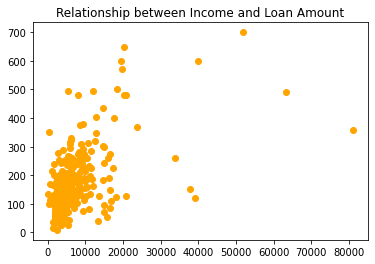

In [50]:
#check the relationship between the Income and Loan Amount using a scatter plot

plt.scatter(cr_train["ApplicantIncome"], cr_train["LoanAmount"],color="orange")

plt.title("Relationship between Income and Loan Amount")

<AxesSubplot:>

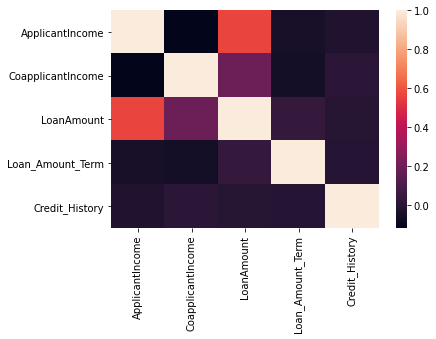

In [51]:
#checking correlation 
sns.heatmap(cr_train.corr())

In [52]:
#checking correlation between different variables

cr_train.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.565181,-0.046531,-0.018615
CoapplicantIncome,-0.116605,1.000000,0.189218,-0.059383,0.011134
LoanAmount,0.565181,0.189218,1.000000,0.036960,-0.000607
Loan_Amount_Term,-0.046531,-0.059383,0.036960,1.000000,-0.004705
Credit_History,-0.018615,0.011134,-0.000607,-0.004705,1.000000


In [53]:
#Frequency Table

cr_train['Gender'].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

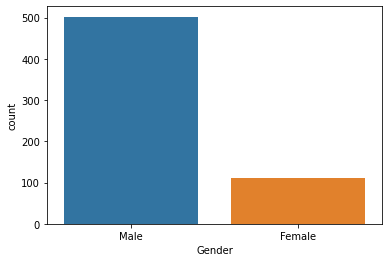

In [54]:
#do a count plot check for categorical variable

sns.countplot(x="Gender",data=cr_train)
plt.show()

In [55]:
cr_train["Married"].value_counts()

Yes    401
No     213
Name: Married, dtype: int64

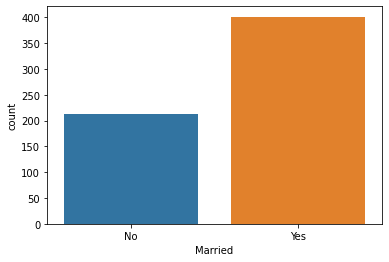

In [56]:
sns.countplot(x="Married",data=cr_train)
plt.show()

In [57]:
cr_train["Dependents"].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

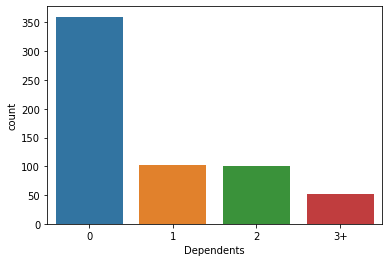

In [58]:
sns.countplot(x="Dependents",data=cr_train)
plt.show()

In [59]:
#central tendency of income

cr_train["ApplicantIncome"].median()

3812.5

<AxesSubplot:ylabel='Frequency'>

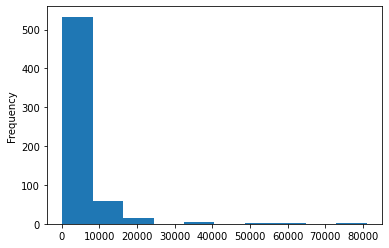

In [60]:
#Histogram of the applicant income in the training dataset

cr_train["ApplicantIncome"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

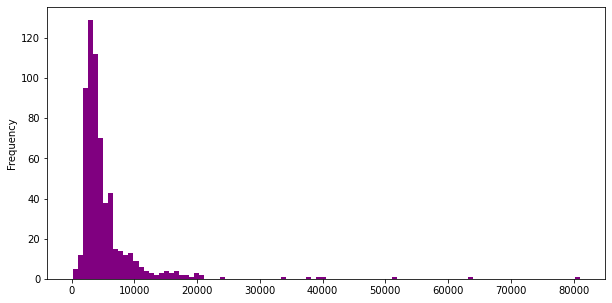

In [61]:
#Effect of increasing the bin size
#skewness evident

cr_train["ApplicantIncome"].plot.hist(bins=100,figsize=(10,5), color ="purple")

In [62]:
#crosstabulating the gender and loan status

pd.crosstab(cr_train["Gender"], cr_train["Loan_Status"])

Loan_Status,N,Y
Gender,,
Female,37,75
Male,155,347


<AxesSubplot:xlabel='Gender', ylabel='count'>

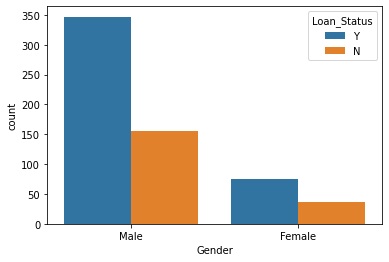

In [63]:
#Gender vs loan Approval Status

sns.countplot(x="Gender",hue="Loan_Status",data=cr_train)

In [64]:
#Crosstabulating the Dependents and Loan Approval Status

pd.crosstab(cr_train["Dependents"], cr_train["Loan_Status"])

Loan_Status,N,Y
Dependents,,
0,113,247
1,36,66
2,25,76
3+,18,33


<AxesSubplot:xlabel='Dependents', ylabel='count'>

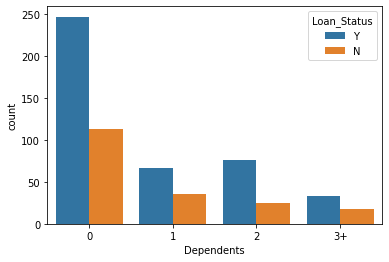

In [65]:
#Dependents vs loan Status

sns.countplot(x="Dependents",hue="Loan_Status",data=cr_train)

In [66]:
#Crosstabulating the Education and laon Approval Status

pd.crosstab(cr_train["Education"], cr_train["Loan_Status"])

Loan_Status,N,Y
Education,,
Graduate,140,340
Not Graduate,52,82


<AxesSubplot:xlabel='Education', ylabel='count'>

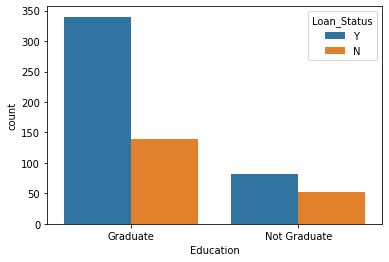

In [67]:
#Education vs laon Approval Status

sns.countplot(x="Education",hue="Loan_Status",data=cr_train)

In [68]:
#crosstabulation the Credit History and Loan Approval Status

pd.crosstab(cr_train["Credit_History"],cr_train["Loan_Status"])

Loan_Status,N,Y
Credit_History,,
0.0,82,7
1.0,110,415


<AxesSubplot:xlabel='Credit_History', ylabel='count'>

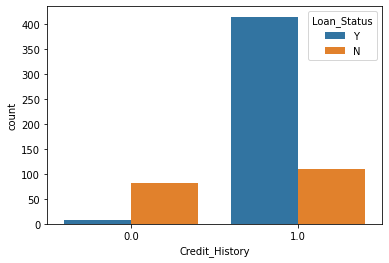

In [69]:
#Credit History vs Loan Approval Status

sns.countplot(x="Credit_History",hue="Loan_Status",data=cr_train)

In [70]:
#Crosstabulating the Self Employed and Laon Approval Status

pd.crosstab(cr_train["Self_Employed"],cr_train["Loan_Status"])

Loan_Status,N,Y
Self_Employed,,
No,166,366
Yes,26,56


<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

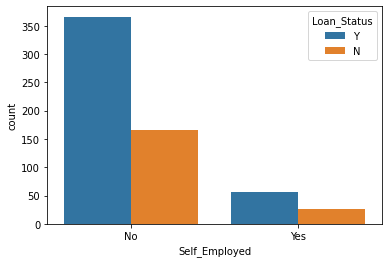

In [71]:
#Self employed vs Laon Approval Status

sns.countplot(x="Self_Employed",hue="Loan_Status",data=cr_train)

In [72]:
#Crosstabulating the Property Area and Loan Approval Status

pd.crosstab(cr_train["Property_Area"],cr_train["Loan_Status"])

Loan_Status,N,Y
Property_Area,,
Rural,69,110
Semiurban,54,179
Urban,69,133


<AxesSubplot:xlabel='Property_Area', ylabel='count'>

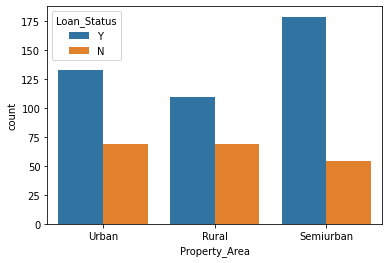

In [73]:
#Property Area Type vs Loan Approval Status

sns.countplot(x="Property_Area",hue="Loan_Status",data=cr_train)

In [74]:
#Central value for co applicant income

cr_train["CoapplicantIncome"].median()

1188.5

<AxesSubplot:ylabel='Frequency'>

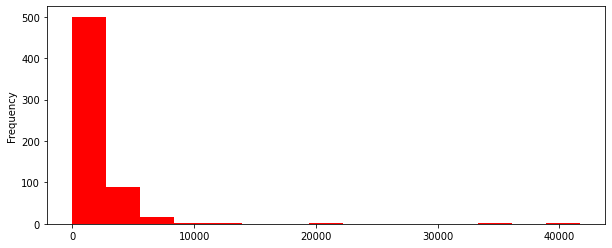

In [75]:
#Co-applicant Income histogram and binning

cr_train['CoapplicantIncome'].plot.hist(bins=15,figsize=(10,4),color="red")

In [76]:
#Central value for Loan Amount

cr_train["LoanAmount"].median()

128.0

<AxesSubplot:ylabel='Frequency'>

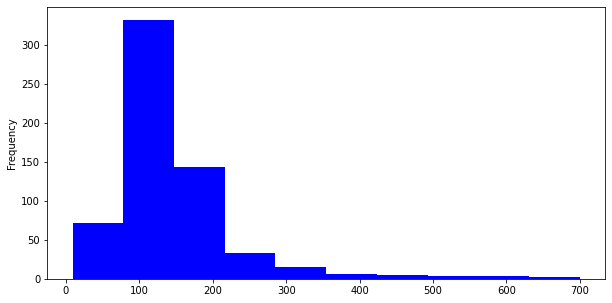

In [81]:
cr_train["LoanAmount"].plot.hist(bins=10,figsize=(10,5),color="blue")

In [77]:
#Central value for Loan Amount Term

cr_train["Loan_Amount_Term"].median()

360.0

<AxesSubplot:ylabel='Frequency'>

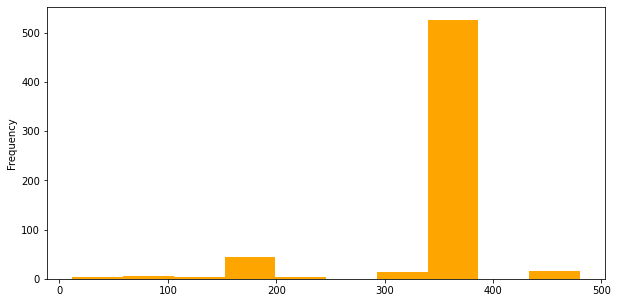

In [78]:
cr_train["Loan_Amount_Term"].plot.hist(bins=10,figsize=(10,5),color="orange")

<AxesSubplot:xlabel='Gender', ylabel='ApplicantIncome'>

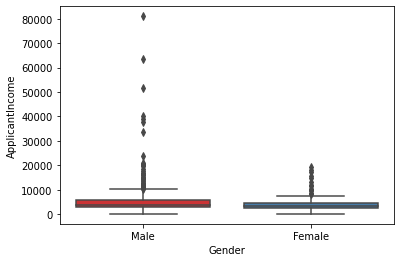

In [82]:
sns.boxplot(x="Gender",y="ApplicantIncome",data=cr_train,palette="Set1")

In [83]:
cr_train_dummy.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,128.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1
1,4583,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,0,0,0,0,1,0,1,1
3,2583,2358.0,120.0,360.0,1.0,1,1,0,0,0,1,0,0,1,1
4,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1


In [84]:
#Segregating the input and output variable by dropping the status column from the cr_training_data

cr_train_inp = cr_train_dummy.drop(["Loan_Status_Y"],axis=1)

cr_train_out= cr_train_dummy["Loan_Status_Y"]

In [85]:
#import LogisticRegression 

from sklearn.linear_model import LogisticRegression

log_reg =LogisticRegression()

log_reg.fit(cr_train_inp,cr_train_out)

LogisticRegression()

In [86]:
cr_train_dummy.shape

(614, 15)

In [87]:
cr_test_dummy.shape

(367, 14)

In [88]:
cr_valid_dummy.shape

(367, 14)

In [89]:
#prediction on test_data

prediction =log_reg.predict(cr_test_dummy)
prediction

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [90]:
#prediction on valid_data

prediction_valid =log_reg.predict(cr_valid_dummy)

prediction_valid

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

# Model Evaluation using performance measures

In [97]:
#Loading Required Library

#Classification Report
from sklearn.metrics import classification_report

#confusion matrix
from sklearn.metrics import confusion_matrix

#Accuracy score
from sklearn.metrics import accuracy_score

##### On Test Data Set

In [95]:
#confusion matrix for Valid Loan Status and Prediction on test data

confusion_matrix(Valid_Loan_Status,prediction)

array([[ 57,  20],
       [  3, 287]], dtype=int64)

In [92]:
#performance measures/ratios of Prediction on test data

classification_report(Valid_Loan_Status,prediction)

'              precision    recall  f1-score   support\n\n           0       0.95      0.74      0.83        77\n           1       0.93      0.99      0.96       290\n\n    accuracy                           0.94       367\n   macro avg       0.94      0.86      0.90       367\nweighted avg       0.94      0.94      0.93       367\n'

In [98]:
#Accuracy score with Prediction on Test Data

accuracy_score(Valid_Loan_Status,prediction)*100

93.73297002724796

##### On Valid Data Set

In [96]:
#confusion matrix for Valid Loan Staus and Prediction on Valid data

confusion_matrix(Valid_Loan_Status,prediction_valid)

array([[ 57,  20],
       [  3, 287]], dtype=int64)

In [93]:
#performance measures of prediction on validation data

classification_report(Valid_Loan_Status,prediction_valid)

'              precision    recall  f1-score   support\n\n           0       0.95      0.74      0.83        77\n           1       0.93      0.99      0.96       290\n\n    accuracy                           0.94       367\n   macro avg       0.94      0.86      0.90       367\nweighted avg       0.94      0.94      0.93       367\n'

In [99]:
#Accuracy Score with Prediction on Valid Data

accuracy_score(Valid_Loan_Status,prediction_valid)*100

93.73297002724796

In [100]:
#Add a column for the predicted class in the test data set

cr_test["Prediction"]=prediction

In [101]:
cr_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Prediction
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,1
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,1
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,1
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban,1
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,1
